Anggota Kelompok :

1. Reyza Rahmatsyah - 2540122716
2. Stefan Bondito Giovanno - 2540122041
3. Gregory Nicolla -

# Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix

# 1. Data Preprocessing

## a. Import Data

In [2]:
import gdown
import zipfile
url = 'https://drive.google.com/drive/folders/1DwqeAZWO7qhog0Ar4btPMoL7EZljYQDX?usp=sharing'
gdown.download_folder(url)

Retrieving folder contents


Processing file 1JG2i33getB48m0Eel14oUguV_cI3JI6U archive.zip
Processing file 1RJWEjAD3U5CWyUz4X9ZpH4EAbcAWPjD0 stratified_sample.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1JG2i33getB48m0Eel14oUguV_cI3JI6U
From (redirected): https://drive.google.com/uc?id=1JG2i33getB48m0Eel14oUguV_cI3JI6U&confirm=t&uuid=1a98f9ee-64b4-4c8e-89a5-4bc2c5409a53
To: /content/Dataset/archive.zip
100%|██████████| 58.7M/58.7M [00:01<00:00, 48.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RJWEjAD3U5CWyUz4X9ZpH4EAbcAWPjD0
From (redirected): https://drive.google.com/uc?id=1RJWEjAD3U5CWyUz4X9ZpH4EAbcAWPjD0&confirm=t&uuid=e60a7be2-98a1-4b7e-86b6-ae5cc02875c2
To: /content/Dataset/stratified_sample.zip
100%|██████████| 62.8M/62.8M [00:00<00:00, 76.5MB/s]
Download completed


['/content/Dataset/archive.zip', '/content/Dataset/stratified_sample.zip']

In [3]:
!unzip /content/Dataset/stratified_sample.zip

Archive:  /content/Dataset/stratified_sample.zip
 extracting: stratified_sample.csv   


## b. Read Data

In [4]:
df = pd.read_csv('stratified_sample.csv', encoding='latin-1')
df.head()

,Class,Description
0,Lung_Cancer,"""(a) shows a frame from the 4D acquisition fro..."
1,Colon_Cancer,""" tumor associated macrophages tam constitut..."
2,Thyroid_Cancer,Thyroid surgery in children in a single insti...
3,Thyroid_Cancer,peripheral serum metabolomic profiles inform ...
4,Lung_Cancer,"""Accordingly the protease inhibitor E-64d part..."


In [5]:
label_encode = {"Class": {"Lung_Cancer":0, "Colon_Cancer":1, "Thyroid_Cancer":2}}
df = df.replace(label_encode)

In [6]:
df.head()

,Class,Description
0,0,"""(a) shows a frame from the 4D acquisition fro..."
1,1,""" tumor associated macrophages tam constitut..."
2,2,Thyroid surgery in children in a single insti...
3,2,peripheral serum metabolomic profiles inform ...
4,0,"""Accordingly the protease inhibitor E-64d part..."


## c. Data Cleaning

In [7]:
## Function Cleaning Dasar
def cleaning(dataframe):
    df_clean = dataframe.str.lower()
    df_clean = [re.sub(r"\d+","",i )for i in df_clean]
    df_clean = [re.sub(r'[^\w]', ' ', i)for i in df_clean]
    df_clean = [re.sub(r'_',' ',i)for i in df_clean]
    df_clean = [re.sub(r'\s+',' ',i)for i in df_clean]

    return df_clean

In [8]:
clean_desc = cleaning(df['Description'])

In [9]:
df.insert(2, 'Clean Description', clean_desc)

In [10]:
df.head()

,Class,Description,Clean Description
0,0,"""(a) shows a frame from the 4D acquisition fro...",a shows a frame from the d acquisition from p...
1,1,""" tumor associated macrophages tam constitut...",tumor associated macrophages tam constitute t...
2,2,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single instit...
3,2,peripheral serum metabolomic profiles inform ...,peripheral serum metabolomic profiles inform ...
4,0,"""Accordingly the protease inhibitor E-64d part...",accordingly the protease inhibitor e d partia...


In [11]:
max_sen = df["Clean Description"].str.split().str.len().max()

In [12]:
max_sen

5247

## d. Data Splitting

In [13]:
## Splitting
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 41)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

## e. Tokenization

In [14]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
def tokenizing(text):
  return word_tokenize(text)

train_df['tokenized'] = train_df['Clean Description'].apply(tokenizing)
test_df['tokenized'] = test_df['Clean Description'].apply(tokenizing)

In [16]:
train_df.head()

,Class,Description,Clean Description,tokenized
0,0,"""Actin was probed by antibody from Sigma (cata...",actin was probed by antibody from sigma catal...,"[actin, was, probed, by, antibody, from, sigma..."
1,1,high throughput methods in biological and bi...,high throughput methods in biological and bio...,"[high, throughput, methods, in, biological, an..."
2,0,"""Background: This study evaluated the efficacy...",background this study evaluated the efficacy ...,"[background, this, study, evaluated, the, effi..."
3,0,"""The LSCC tissue microarrays contain 75 matche...",the lscc tissue microarrays contain matched p...,"[the, lscc, tissue, microarrays, contain, matc..."
4,1,""" ovarian cancer is the leading cause of canc...",ovarian cancer is the leading cause of cancer...,"[ovarian, cancer, is, the, leading, cause, of,..."


In [17]:
test_df.head()

,Class,Description,Clean Description,tokenized
0,2,"""Accumulating evidence has revealed the critic...",accumulating evidence has revealed the critic...,"[accumulating, evidence, has, revealed, the, c..."
1,0,"""The probandÂs father (II-5) and sister (III-...",the probandâ s father ii and sister iii were ...,"[the, probandâ, s, father, ii, and, sister, ii..."
2,1,""" it is estimated that around Â of patients ...",it is estimated that around â of patients wit...,"[it, is, estimated, that, around, â, of, patie..."
3,2,Microbial colonisation of the gastrointestinal...,microbial colonisation of the gastrointestinal...,"[microbial, colonisation, of, the, gastrointes..."
4,0,"""In this study we identified a novel pathway f...",in this study we identified a novel pathway f...,"[in, this, study, we, identified, a, novel, pa..."


## f. Filtering

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwords_list = set(stopwords.words('english'))

## Function to Remove Stopwords
def stopword_removal(tokenized):
  return [word for word in tokenized if word.lower() not in stopwords_list]

train_df['filtered'] = train_df['tokenized'].apply(stopword_removal)
test_df['filtered'] = test_df['tokenized'].apply(stopword_removal)

In [20]:
train_df.head()

,Class,Description,Clean Description,tokenized,filtered
0,0,"""Actin was probed by antibody from Sigma (cata...",actin was probed by antibody from sigma catal...,"[actin, was, probed, by, antibody, from, sigma...","[actin, probed, antibody, sigma, catalog, gene..."
1,1,high throughput methods in biological and bi...,high throughput methods in biological and bio...,"[high, throughput, methods, in, biological, an...","[high, throughput, methods, biological, biomed..."
2,0,"""Background: This study evaluated the efficacy...",background this study evaluated the efficacy ...,"[background, this, study, evaluated, the, effi...","[background, study, evaluated, efficacy, safet..."
3,0,"""The LSCC tissue microarrays contain 75 matche...",the lscc tissue microarrays contain matched p...,"[the, lscc, tissue, microarrays, contain, matc...","[lscc, tissue, microarrays, contain, matched, ..."
4,1,""" ovarian cancer is the leading cause of canc...",ovarian cancer is the leading cause of cancer...,"[ovarian, cancer, is, the, leading, cause, of,...","[ovarian, cancer, leading, cause, cancerrelate..."


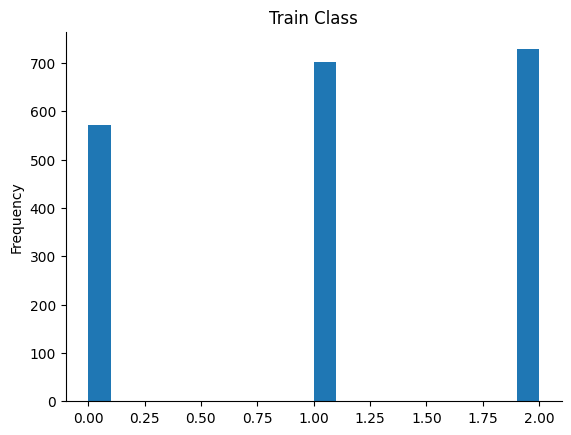

In [26]:
from matplotlib import pyplot as plt
train_df['Class'].plot(kind='hist', bins=20, title='Train Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
test_df.head()

,Class,Description,Clean Description,tokenized,filtered
0,2,"""Accumulating evidence has revealed the critic...",accumulating evidence has revealed the critic...,"[accumulating, evidence, has, revealed, the, c...","[accumulating, evidence, revealed, critical, r..."
1,0,"""The probandÂs father (II-5) and sister (III-...",the probandâ s father ii and sister iii were ...,"[the, probandâ, s, father, ii, and, sister, ii...","[probandâ, father, ii, sister, iii, unaffected..."
2,1,""" it is estimated that around Â of patients ...",it is estimated that around â of patients wit...,"[it, is, estimated, that, around, â, of, patie...","[estimated, around, â, patients, early, stage,..."
3,2,Microbial colonisation of the gastrointestinal...,microbial colonisation of the gastrointestinal...,"[microbial, colonisation, of, the, gastrointes...","[microbial, colonisation, gastrointestinal, tr..."
4,0,"""In this study we identified a novel pathway f...",in this study we identified a novel pathway f...,"[in, this, study, we, identified, a, novel, pa...","[study, identified, novel, pathway, sp, mediat..."


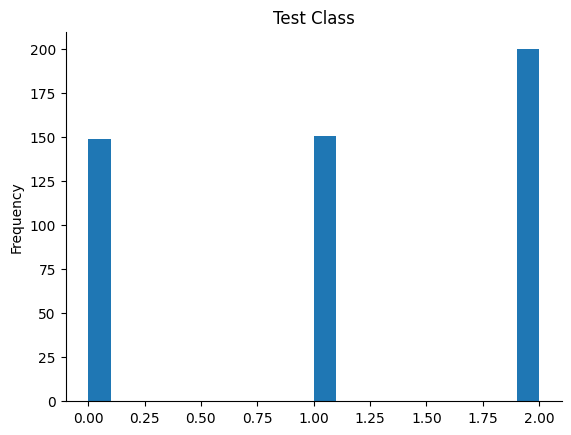

In [27]:
from matplotlib import pyplot as plt
test_df['Class'].plot(kind='hist', bins=20, title='Test Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

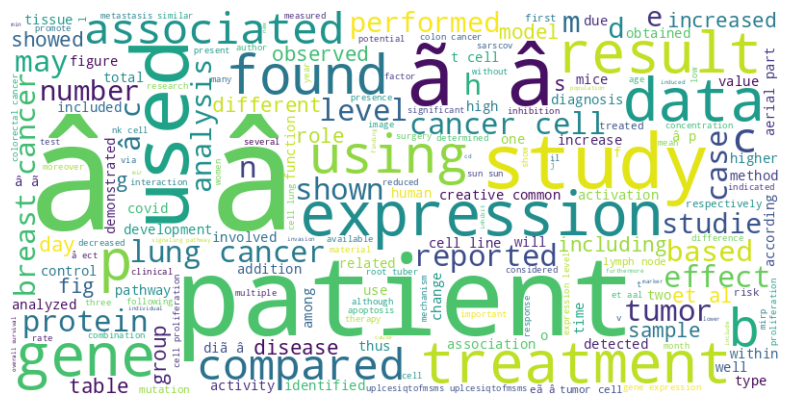

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the filtered tokens into a single string
total_tokens = " ".join(word for words in test_df["tokenized"] for word in words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(total_tokens)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
